<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/cvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conditional Value at Risk (CVaR)**

**Expected Shortfall**. CVaR is a risk measure that considers the average of the worst losses, beyond the Value at Risk (VaR) threshold.

Value at Risk (VaR) at 95.0% confidence level: 0.0153
Conditional Value at Risk (CVaR) at 95.0% confidence level: 0.0193


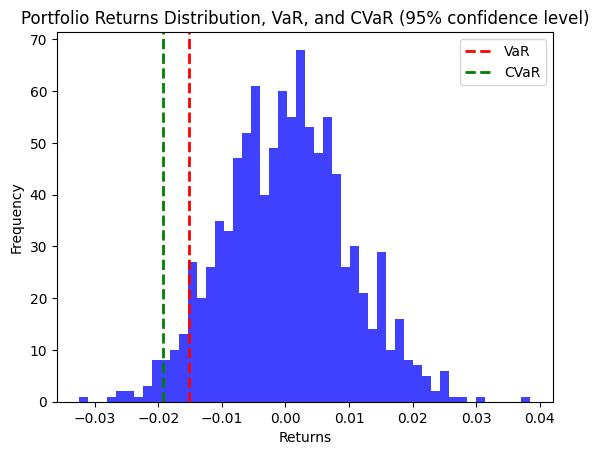

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample portfolio returns (e.g., daily returns)
np.random.seed(42)
portfolio_returns = np.random.normal(0, 0.01, 1000)  # Simulated daily returns

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Function to calculate VaR
def calculate_var(returns, confidence_level):
    sorted_returns = np.sort(returns)  # Sort the returns
    var_index = int((1 - confidence_level) * len(sorted_returns))  # Get the VaR index
    var_value = -sorted_returns[var_index]  # VaR is the negative of the return at the VaR index
    return var_value, sorted_returns[:var_index]  # Also return the returns worse than VaR

# Function to calculate CVaR
def calculate_cvar(returns, confidence_level):
    var_value, worst_returns = calculate_var(returns, confidence_level)
    cvar_value = -np.mean(worst_returns)  # CVaR is the mean of returns worse than VaR
    return var_value, cvar_value

# Calculate VaR and CVaR for 95% confidence level
var_95, cvar_95 = calculate_cvar(portfolio_returns, confidence_level)

print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level: {var_95:.4f}")
print(f"Conditional Value at Risk (CVaR) at {confidence_level * 100}% confidence level: {cvar_95:.4f}")

# Plot the returns with VaR and CVaR
plt.hist(portfolio_returns, bins=50, alpha=0.75, color='blue')
plt.axvline(-var_95, color='red', linestyle='dashed', linewidth=2, label='VaR')
plt.axvline(-cvar_95, color='green', linestyle='dashed', linewidth=2, label='CVaR')
plt.title(f'Portfolio Returns Distribution, VaR, and CVaR (95% confidence level)')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* VaR Calculation: The calculate_var() function sorts the portfolio returns and identifies the VaR as the quantile corresponding to the confidence level.
* CVaR Calculation: In calculate_cvar(), the CVaR is computed by averaging the returns that are worse than (i.e., less than or equal to) the VaR.
* The histogram shows both the VaR and CVaR thresholds, with VaR marked in red and CVaR marked in green.

The VaR represents the threshold below which the worst losses occur (e.g., 5% worst-case losses). The CVaR provides the average of these worst-case losses, offering a more comprehensive measure of risk beyond just the VaR.